Derivatives
=========


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from math import sin, cos, tan, pi
from pyautospec import FunctionWfa

Trigonometric functions
----------------------------------

In [2]:
# learn the sin function in the [0,2π] interval
sin_a = FunctionWfa().fit(sin, x0=0.0, x1=2*pi, learn_resolution=8)

sin_a

  0%|          | 0/511 [00:00<?, ?it/s]

Singular values: [3.6028552e+02 2.4054941e+01 1.0401375e+01 8.0901470e+00 1.2974632e-01
 3.4995925e-02]


  FunctionWfa(N=6) <built-in function sin>: [0.00,6.28] → R

  ╭───┐       ╭───┐       ╭───┐
  │ α ├─ ... ─┤ A ├─ ... ─┤ ω │
  └─┬─┘       └─┬─┘       └─┬─┘

         states:   6
  alphabet size:   2
        

<IPython.core.display.Javascript object>


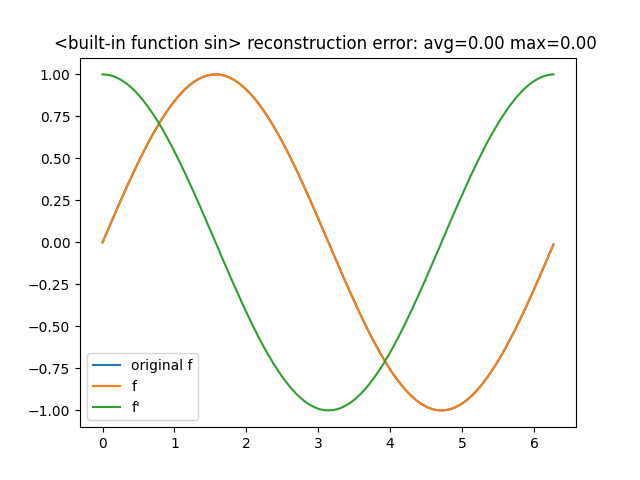

In [3]:
sin_a.comparison_chart(n_points=500, plot_derivative=True)

let's compare the derivative with `cos(x)`

<IPython.core.display.Javascript object>


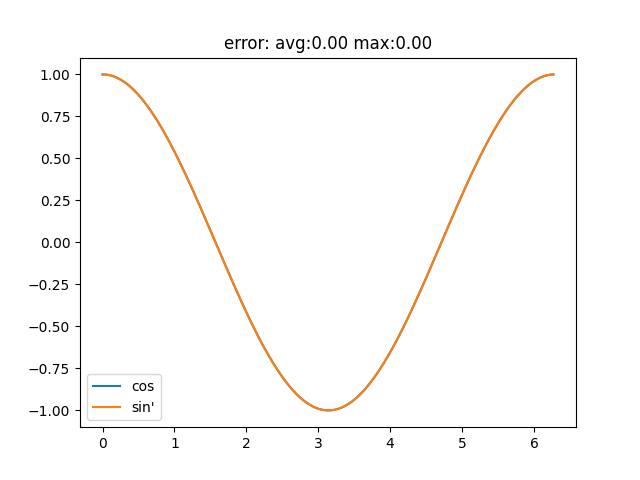

In [4]:
xs = np.linspace(0,2*pi, num=500, endpoint=False)
v0 = np.cos(xs)
v1 = [sin_a.prime(x) for x in xs]

error = np.abs(v0-v1)

plt.figure()

plt.title("error: avg:{:.2f} max:{:.2f}".format(np.average(error), np.max(error)))

plt.plot(xs, v0, label="cos")
plt.plot(xs, v1, label="sin'")

plt.legend()

In [5]:
# learn the cos function in the [0,2π] interval
cos_a = FunctionWfa().fit(cos, x0=0.0, x1=2*pi, learn_resolution=8)

cos_a

  0%|          | 0/511 [00:00<?, ?it/s]

Singular values: [359.71368     30.015036    16.27605      1.6160957    0.79122925]


  FunctionWfa(N=5) <built-in function cos>: [0.00,6.28] → R

  ╭───┐       ╭───┐       ╭───┐
  │ α ├─ ... ─┤ A ├─ ... ─┤ ω │
  └─┬─┘       └─┬─┘       └─┬─┘

         states:   5
  alphabet size:   2
        

<IPython.core.display.Javascript object>


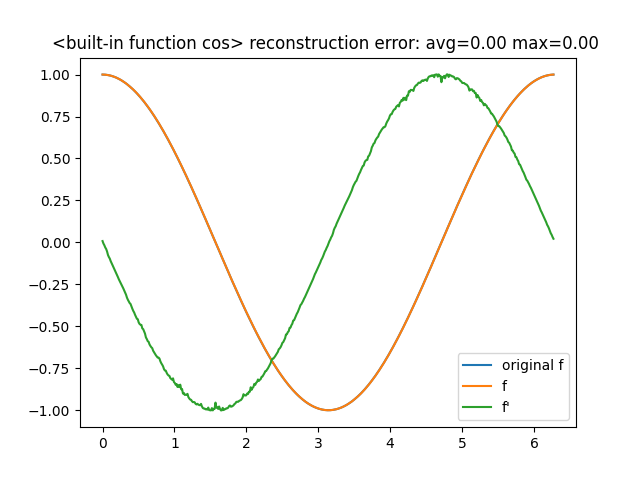

In [6]:
cos_a.comparison_chart(n_points=500, plot_derivative=True)

<IPython.core.display.Javascript object>


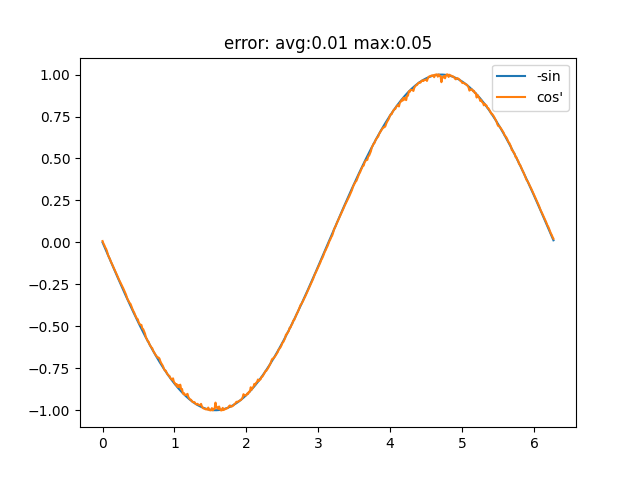

In [7]:
xs = np.linspace(0,2*pi, num=500, endpoint=False)
v0 = -np.sin(xs)
v1 = [cos_a.prime(x) for x in xs]

error = np.abs(v0-v1)

plt.figure()

plt.title("error: avg:{:.2f} max:{:.2f}".format(np.average(error), np.max(error)))

plt.plot(xs, v0, label="-sin")
plt.plot(xs, v1, label="cos'")

plt.legend()

Uhmmm... it is not as smooth as one would have liked. This must be investigated.

In [8]:
# learn the tan function in the (-π/2,+π/2) interval
d = 0.05
tan_a = FunctionWfa().fit(tan, x0=-pi/2+d, x1=pi/2-d, learn_resolution=8)

tan_a

  0%|          | 0/511 [00:00<?, ?it/s]

Singular values: [1.7563842e+03 2.7681570e+02 1.1002290e+02 5.9399155e+01 1.7955683e+01
 1.1242377e+01 2.5507686e+00 1.7522454e+00 3.4025031e-01 2.4295633e-01]


  FunctionWfa(N=10) <built-in function tan>: [-1.52,1.52] → R

  ╭───┐       ╭───┐       ╭───┐
  │ α ├─ ... ─┤ A ├─ ... ─┤ ω │
  └─┬─┘       └─┬─┘       └─┬─┘

         states:  10
  alphabet size:   2
        

<IPython.core.display.Javascript object>


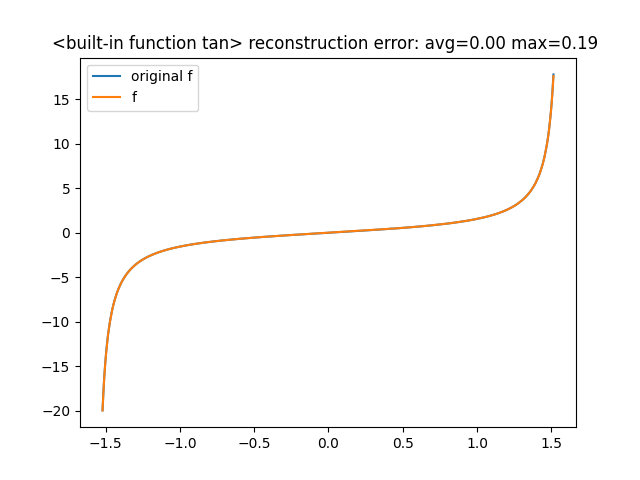

In [9]:
tan_a.comparison_chart(n_points=500)

<IPython.core.display.Javascript object>


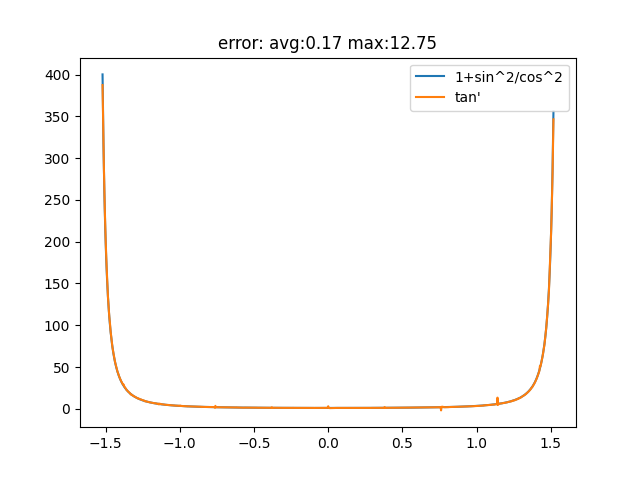

In [10]:
xs = np.linspace(-pi/2+d, pi/2-d, num=1000, endpoint=False)
v0 = [1 + (sin(x)**2) / (cos(x)**2) for x in xs]
v1 = [tan_a.prime(x) for x in xs]

error = np.abs(np.array(v0) - np.array(v1))

plt.figure()

plt.title("error: avg:{:.2f} max:{:.2f}".format(np.average(error), np.max(error)))

plt.plot(xs, v0, label="1+sin^2/cos^2")
plt.plot(xs, v1, label="tan'")

plt.legend()

Polynomials
------------------

In [11]:
# learn 3x^2 + 2x + 2 in the [-10,+10] interval
p2_a = FunctionWfa().fit(lambda x: 3*x**2 + 2*x + 2, x0=-10.0, x1=10.0, learn_resolution=4)

p2_a

  0%|          | 0/31 [00:00<?, ?it/s]

Singular values: [4067.5374  1047.7883   511.31317]


  FunctionWfa(N=3) <function <lambda> at 0x6b3cc07281f0>: [-10.00,10.00] → R

  ╭───┐       ╭───┐       ╭───┐
  │ α ├─ ... ─┤ A ├─ ... ─┤ ω │
  └─┬─┘       └─┬─┘       └─┬─┘

         states:   3
  alphabet size:   2
        

<IPython.core.display.Javascript object>


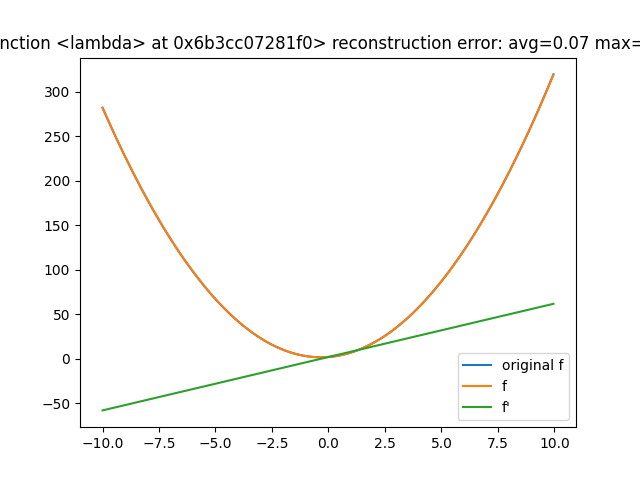

In [12]:
p2_a.comparison_chart(n_points=500, plot_derivative=True)

<IPython.core.display.Javascript object>


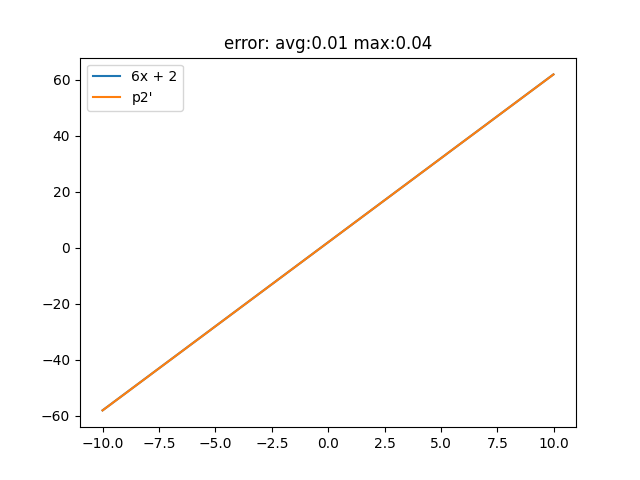

In [13]:
xs = np.linspace(-10, 10, num=1000, endpoint=False)
v0 = [6*x + 2 for x in xs]
v1 = [p2_a.prime(x) for x in xs]

error = np.abs(np.array(v0) - np.array(v1))

plt.figure()

plt.title("error: avg:{:.2f} max:{:.2f}".format(np.average(error), np.max(error)))

plt.plot(xs, v0, label="6x + 2")
plt.plot(xs, v1, label="p2'")

plt.legend()

In [14]:
# learn 5x^3 - 3x^2 + 2x + 2 in the [-10,+10] interval
p3_a = FunctionWfa().fit(lambda x: 5*x**3 - 3*x**2 + 2*x + 2, x0=-10.0, x1=10.0, learn_resolution=4)

p3_a

  0%|          | 0/31 [00:00<?, ?it/s]

Singular values: [56853.19   20949.314   5121.6206  2738.6418]


  FunctionWfa(N=4) <function <lambda> at 0x6b3cc07ec3a0>: [-10.00,10.00] → R

  ╭───┐       ╭───┐       ╭───┐
  │ α ├─ ... ─┤ A ├─ ... ─┤ ω │
  └─┬─┘       └─┬─┘       └─┬─┘

         states:   4
  alphabet size:   2
        

<IPython.core.display.Javascript object>


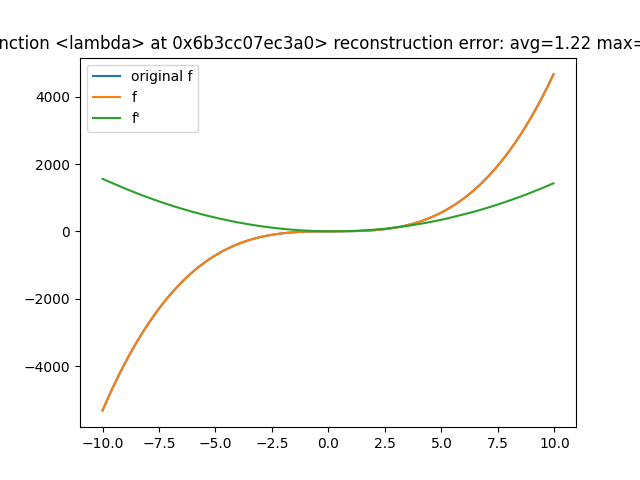

In [15]:
p3_a.comparison_chart(n_points=500, plot_derivative=True)

<IPython.core.display.Javascript object>


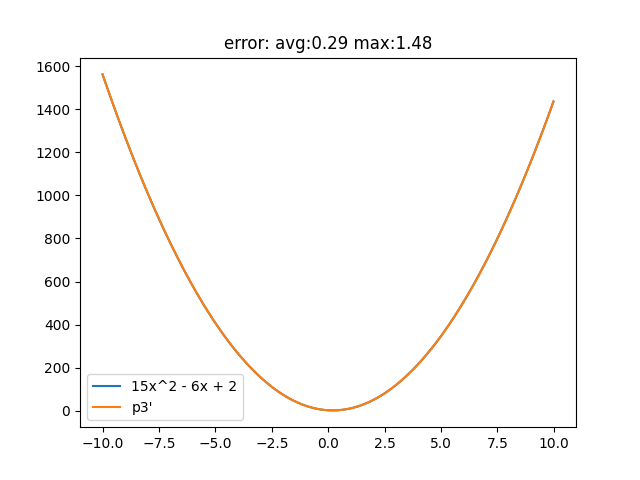

In [16]:
xs = np.linspace(-10, 10, num=1000, endpoint=False)
v0 = [15*x**2 - 6*x + 2 for x in xs]
v1 = [p3_a.prime(x) for x in xs]

error = np.abs(np.array(v0) - np.array(v1))

plt.figure()

plt.title("error: avg:{:.2f} max:{:.2f}".format(np.average(error), np.max(error)))

plt.plot(xs, v0, label="15x^2 - 6x + 2")
plt.plot(xs, v1, label="p3'")

plt.legend()